In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score


In [170]:
df = pd.read_csv(r"./../data/gold_monthly.csv")

print("Null values in the dataset:")
print(df.isnull().sum())

df.head(10)

Null values in the dataset:
Date     0
Price    0
dtype: int64


,Date,Price
0,1833-01,18.93
1,1833-02,18.93
2,1833-03,18.93
3,1833-04,18.93
4,1833-05,18.93
5,1833-06,18.93
6,1833-07,18.93
7,1833-08,18.93
8,1833-09,18.93
9,1833-10,18.93


In [171]:
df.describe()

,Price
count,2306.000000
mean,213.724294
std,438.058888
min,17.060000
25%,18.940000
50%,20.680000
75%,163.997500
max,2894.730000


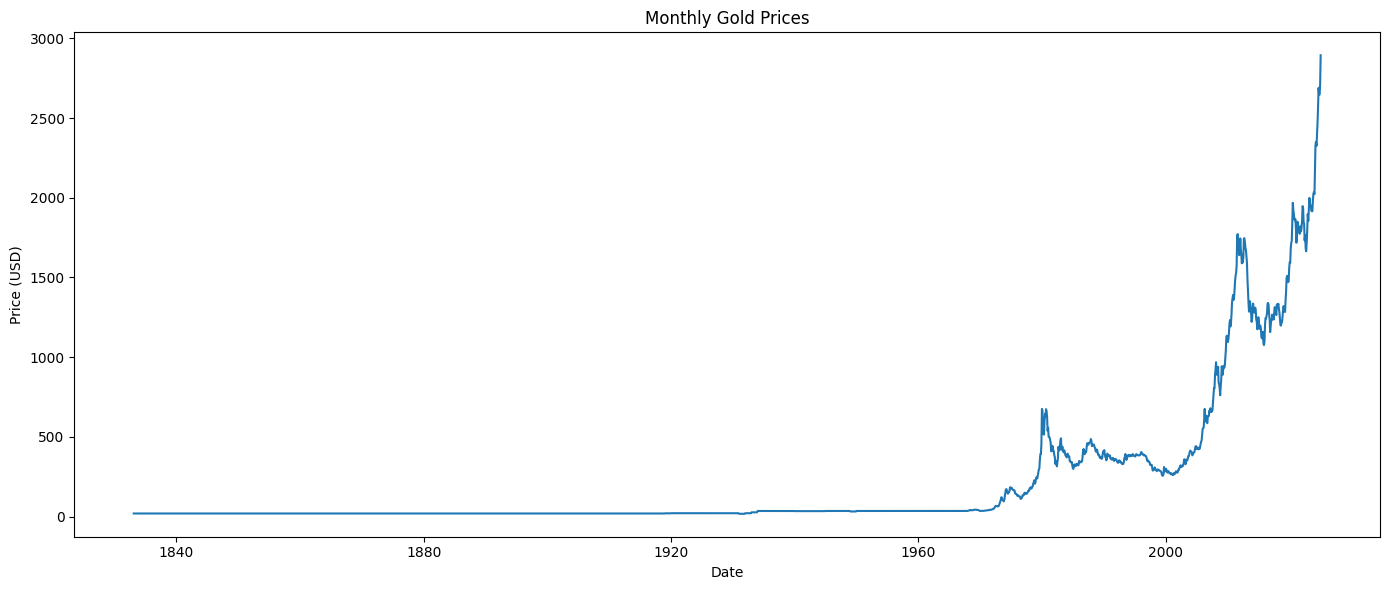

ADF Statistic: 5.0
p-value: 1.0


In [183]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m")
df.set_index('Date', inplace=True)

# Plot original data
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='Price')
plt.title("Monthly Gold Prices")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()



result = adfuller(df['Price'])
print(f"ADF Statistic: {np.round(result[0])}")
print(f"p-value: {np.round(result[1])}")

In [173]:
# First difference to remove trend
df['Price_diff'] = df['Price'].diff()
df.dropna(inplace=True)  # remove first row with NaN

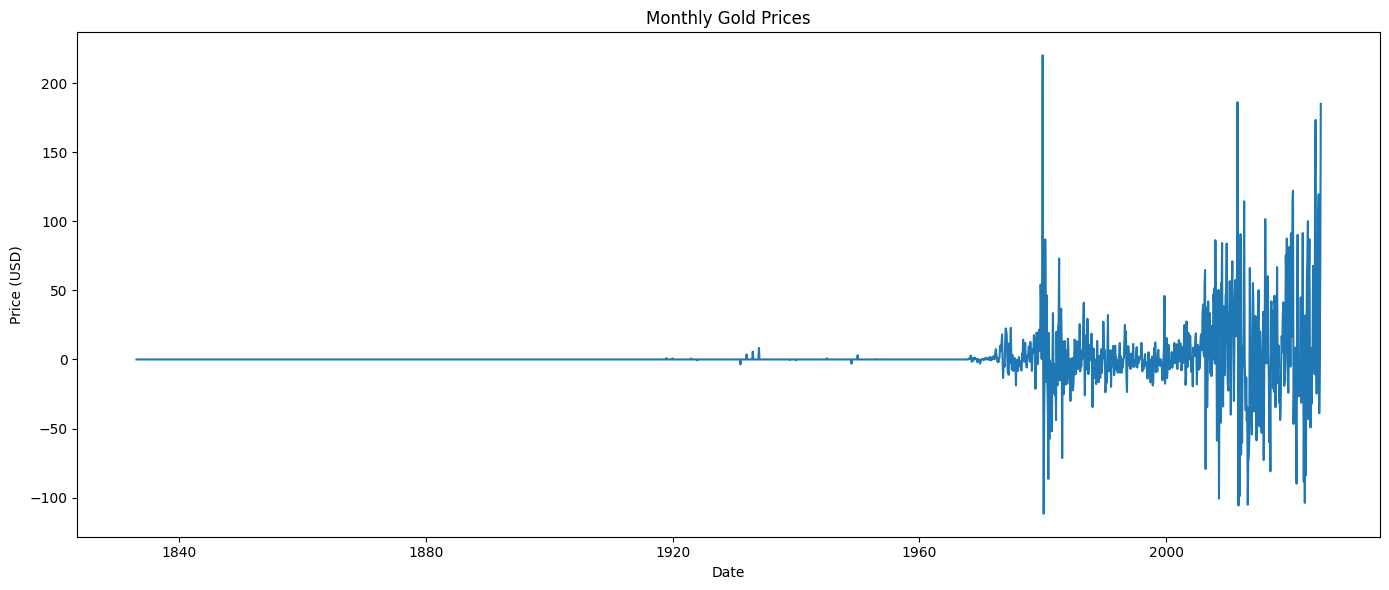

ADF Statistic: -6.0
p-value: 0.0


In [186]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='Price_diff')
plt.title("Monthly Gold Prices")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


result = adfuller(df['Price_diff'])
print(f"ADF Statistic: {np.round(result[0])}")
print(f"p-value: {np.round(result[1])}")

In [188]:
from statsmodels.tsa.arima.model import ARIMA
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='MS')

# Fit ARIMA model (p=5, d=1, q=2)
model = ARIMA(df['Price'], order=(5, 1, 2))
model_fit = model.fit()

# Summary
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2305
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -9862.580
Date:                Tue, 15 Apr 2025   AIC                          19741.160
Time:                        01:39:42   BIC                          19787.099
Sample:                    02-01-1833   HQIC                         19757.907
                         - 02-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2240      0.027      8.273      0.000       0.171       0.277
ar.L2          0.6109      0.027     22.360      0.000       0.557       0.664
ar.L3         -0.1440      0.012    -12.418      0.0

In [203]:
n_periods = 12
forecast = model_fit.forecast(steps=n_periods)

# Generate new monthly dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast
}).set_index('Date')


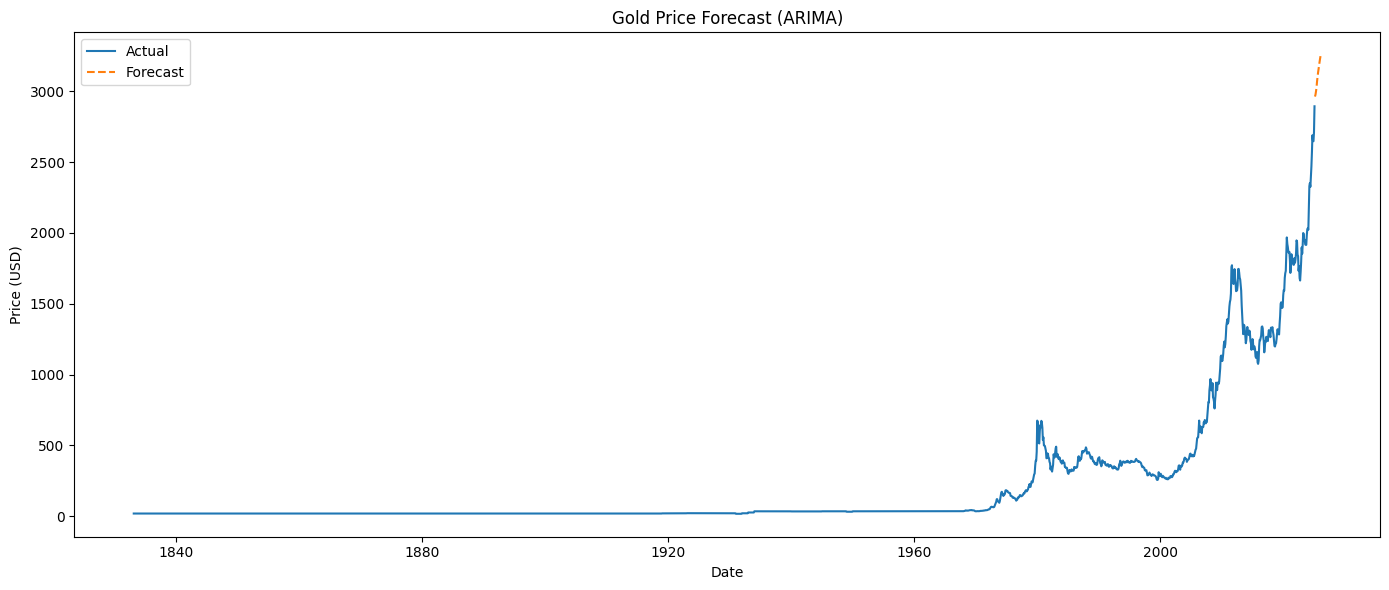

In [204]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='Price', label='Actual')
sns.lineplot(data=forecast_df, x=forecast_df.index, y='Forecast', label='Forecast', linestyle='--')
plt.title("Gold Price Forecast (ARIMA)")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()
